# Time Series Analysis 

## Author - Catalina Ifrim



In [ ]:
"""
UW DATASCI410-Methods for Data Analysis
L08-IntroToTimeSeries

"""

## Instructions

Using the California dairy production dataset, perform **time series analysis** on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. **Is this time series stationary?**
2. **Is there a significant seasonal component?**
3. **For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?**

Then **forecast production for 12 months** and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Load the data

Load the data from the .csv file, add a time series index and examine the head and tail of the data frame.

In [3]:
# Create a dataframe
CADairy = pd.read_csv(fileName)
# Check the shape
CADairy.shape                      

(228, 9)

In [4]:
CADairy.dtypes

Year                   int64
Month                 object
Cotagecheese.Prod    float64
Icecream.Prod        float64
Milk.Prod            float64
N.CA.Fat.Price       float64
Month.Count            int64
monthNumSqred          int64
monthNumCubed          int64
dtype: object

In [5]:
# look at the first few rows
CADairy.head()      

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
0,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
2,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
3,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
4,1995,May,4.470,73.730,2.227,0.8967,5,25,125


In [ ]:
#CADairy['Year'].value_counts()
#CADairy['Month'].value_counts()

Observations:
- There are 228 rows and 9 columns in the dataset
- The column Year contains the years from 1995 to 2013
- The column Month contains all the months for each year, starting with January 1995 until December 2013
- The last three columns contain the month count, the squared month count and the month count cubed 

In [6]:
# Create a time series starting from January 1995 to December 2013 with a monthly frequency
CADairy.index = pd.date_range(start = '1-1-1995', end = '12-31-2013', freq = 'M')

In [7]:
# Check the first and last few rows in the dataframe
CADairy.head()

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,5,25,125


In [8]:
CADairy.tail()

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
2013-08-31,2013,Aug,2.169,78.382,3.400,1.6273,224,50176,11239424
2013-09-30,2013,Sep,2.193,74.871,3.197,1.5519,225,50625,11390625
2013-10-31,2013,Oct,2.284,70.011,3.338,1.5566,226,51076,11543176
2013-11-30,2013,Nov,1.865,61.394,3.275,1.7537,227,51529,11697083
2013-12-31,2013,Dec,2.345,53.653,3.473,1.6747,228,51984,11852352


It can be observed the time series index is added as a date-time for each value in the dataframe.

### Select a time series to perform the analysis 

Below are plotted the time series corresponding to Cottage Cheese Production, Milk Production and Ice Cream Production.

Text(0.5, 1.0, 'California diary production time series')

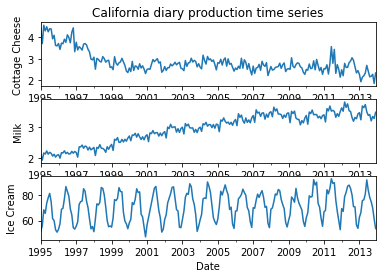

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
CADairy['Cotagecheese.Prod'].plot(ax = ax1)
CADairy['Milk.Prod'].plot(ax = ax2)
CADairy['Icecream.Prod'].plot(ax = ax3)
ax1.set_ylabel('Cottage Cheese')
ax2.set_ylabel('Milk')
ax3.set_ylabel('Ice Cream')
ax3.set_xlabel('Date')
ax1.set_title('California diary production time series')

It can be noted that for Cottage Cheese time series the amplitude of the seasonal variation decreases with time. For Milk
time series, the seasonal component increases with time. For Ice cream time series, the sesonal variation looks stationary.
Next it is __selected the Milk production time series to perform a time series analysis__.
<br>

### Check if the time series is stationary and if there is a significant seasonal component

As noted, __the Milk time series has a sesonal component that increases proportional with the trend, so it will be used a 
multiplicative decomposition model__. The multiplicative model can be transformed to an additive model by taking the 
logarithm of the values. Below it is performed the log tranformation for Milk production and plotted the result for the
milk consumption time series.

In [10]:
# Define a function to plot the time series
def plot_ts(ts, title):
    ts.plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')

Index(['Year', 'Month', 'Cotagecheese.Prod', 'Icecream.Prod', 'Milk.Prod',
       'N.CA.Fat.Price', 'Month.Count', 'monthNumSqred', 'monthNumCubed',
       'Milk_log'],
      dtype='object')

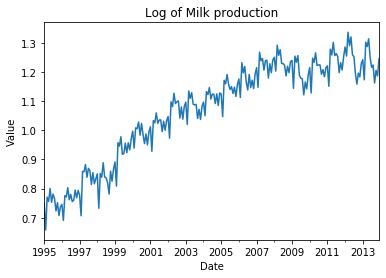

In [11]:
# Apply the log transformation for Milk production and plot the result for the milk consumption time series
CADairy['Milk_log'] = np.log(CADairy['Milk.Prod'])
plot_ts(CADairy['Milk_log'], 'Log of Milk production')
CADairy.columns

It can be noted the following about this time series:
- It has a __significant trend__.
- It has a __clear seasonal component__.
- These observations mean that this is a __non-stationary time series__. 
- For the un-transformed series, the magnitude of the seasonal component increases with trend particularly towards the end.
- For the log transformed series, the seasonal component has a more constant magnitude, but increases slightly with time.

### Perform STL decomposition of the time series

These results show that it is needed an STL decomposition. The STL decomposition is a method for decomposing a time series data
into its trend, seasonal and residual components. Since __the magnitude of the seasonal component increases noticeably with 
increasing trend, it is used a multiplicative (log transformed) decomposition model__. <br>
Next it is defined a function to perform the STL decomposition.

In [12]:
# Define a function for STL decomposition of a time series which has a seasonal, trend, and white noise residual component
import statsmodels.tsa.seasonal as sts
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model)
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

               resid     trend  seasonal
1995-01-31       NaN       NaN  0.009169
1995-02-28       NaN       NaN -0.063646
1995-03-31       NaN       NaN  0.046570
1995-04-30       NaN       NaN  0.026694
1995-05-31       NaN       NaN  0.053586
1995-06-30       NaN       NaN  0.004263
1995-07-31  0.026259  0.746283  0.008616
1995-08-31  0.016510  0.747581  0.002307
1995-09-30  0.014267  0.749151 -0.039741
1995-10-31  0.008047  0.750003 -0.006162
1995-11-30 -0.003504  0.750755 -0.039215
1995-12-31 -0.011135  0.751219 -0.002441
               resid     trend  seasonal
2013-01-31  0.002499  1.230179  0.009169
2013-02-28  0.006582  1.229856 -0.063646
2013-03-31  0.024035  1.231219  0.046570
2013-04-30  0.028554  1.231778  0.026694
2013-05-31  0.027831  1.232307  0.053586
2013-06-30  0.012240  1.233112  0.004263
2013-07-31       NaN       NaN  0.008616
2013-08-31       NaN       NaN  0.002307
2013-09-30       NaN       NaN -0.039741
2013-10-31       NaN       NaN -0.006162
2013-11-30      

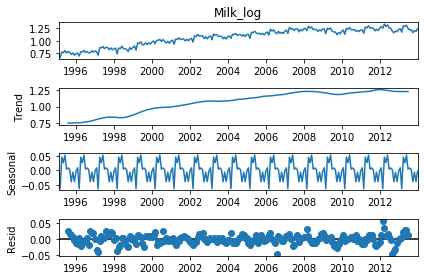

In [13]:
# Decomp Milk
Milk_decomp = decomp_ts(CADairy['Milk_log'])
print(Milk_decomp.head(12))
print(Milk_decomp.tail(12))

This is a monthly time series, so it can be observed that the first and the last six lag values of the residual and trend 
are not known numbers (they are not there), but the seasonal component has values.
<br>

It can be noted the following from the components of the Milk time series:
- __The sesonal component is fairly constant__, although it may not be quite stationary by looking at the remainder.
- __The trend component looks close to a straight line trend__ so it seems to be acceptable removed.

Next we want to __determine if the residual is stationary by applying the Dicky Fuller (DF) test__. The null hypothesis is that
the the time series possesses a unit root and is non-stationary, but with no trend. So, if the p-value in DF test is less than
the significance level (0.05), can be rejected the null hypothesis.<br>
Below it is applied the DF test and printed some summary statistics. The first and last 6 elements are filtered, since they
have NaN values. 

In [14]:
from statsmodels.tsa.stattools import adfuller

# Define a function to apply the Dicky Fuller test
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%'])) 

In [15]:
DF_Test(Milk_decomp.resid[6:-6])   

D-F statistic = -8.280935682685259
p-value = 4.521792223864596e-13
number of lags used = 7
Critical value at 5% confidence = -2.875537986778846
Critical value at 10% confidence = -2.574231080806213


__Observations__:
- The Dickey-Fuller statistic has a large value (aproximatelly minus 8) 
- The p-value is tiny so it can be rejected the null hyphothesis that the time series is not stationary
- There are different cutoffs at 5% and 10%. The DF statistic is really large for these cutoffs, so we can say that the
residual time series is stationary.

It can be concluded that given the DF statistic and the p-value we can reject the null hypothesis and can say that the __Milk
residual time series is stationary__.

In the next step, are compute and plotted the ACF and PACF for the remainder series. The ACF (AutoCorrelation Function) and
PACF (Partial AutoCorrelation Function) are functions from statsmodels used to plot the autocorrelation versus the time lags.
The autocorrelation represents the correlation of the time series with itself, lagged by an offset.

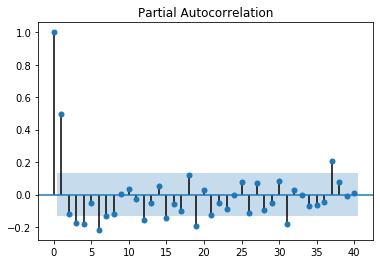

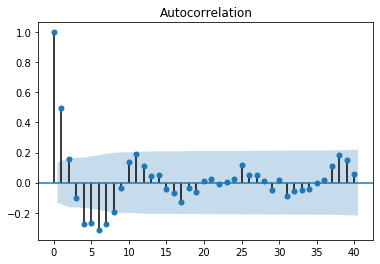

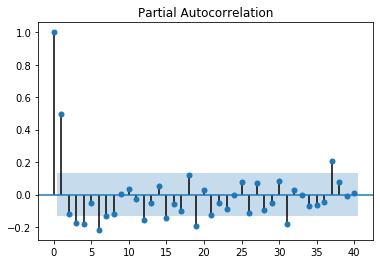

In [16]:
# Compute and plot the ACF and PACF for the Milk remainder series

import statsmodels.graphics.tsaplots as splt
splt.plot_acf(Milk_decomp.resid[6:-6], lags = 40)
splt.plot_pacf(Milk_decomp.resid[6:-6], lags = 40)

It can be noted the following:
- The ACF has mainly one significant non-zero lag (a few other negative marginally significant). The periodicity can be still 
observed, although most of the lags are not significant.
- For the PACF, there is one significant non-zero lag. There is also sign of periodicity that it seems was not quite eliminated.

So, we can say that it was removed the linear trend that is close to a straight line trend. The residual is stationary, but has
some leftover sesonality. So there are signs of periodicity which the STL decomposition did not remove.

Now that there is an STL decomposition of the Milk production time series, it can be computed an __ARIMA model for the 
residual__. To find the best model to use, we need a criteria to compare models with different values of p,d,q components. 
These components are:
- p - the order of the AR term. The order of the autoregressive component is how many lags of the previous values are 
affecting the current value of the time series.
- q - the order of the MA term. The moving average component is how many lags of the white noise component are affecting 
the current value.
- d - the number of differencing required to make the time series stationary. The integrative component is the order of
the random walk, the order the difference that it is removed.
<br>

__To find the best ARIMA model for the residual, it is used the BIC - Bayesian Information Criteria__. BIC is a criteria 
to compare models with different values of p,d,q. The BIC value is used to compute the best model.<br>
Below are defined the two functions that use ARIMA from stasmodel package. ARIMA model has the order p,d,q, so this is 
going to be returned (p,d,q). The first method 'model_ARIMA_2' loops through a grid of autoregresssive integrative (AR) and
moving average (MA) components and returns the best model with lowest BIC. The second method 'step_Arima' starts with a BIC
value very large (9999999999999999.0) and returns the best model that has the lowest BIC value and the corresponding order.

__Note regarding using the method model_ARIMA_2:__

It is used the method model_ARIMA_2 because it could not be installed the new pyramid-arima package. The package contains the
auto_arima method and has the advantage that can omit the errors/warning that are displayed by model_ARIMA_2 method during the
iterative process.

In [17]:
# Define functions to loop through a grid of autoregresssive integrative (AR) and moving average (MA) components
# and return the best model with lowest BIC

def model_ARIMA_2(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.arima_model import ARIMAResults    
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
#    BIC = ARIMAResults.bic(model_fit)
    BIC = model_fit.bic                         # use ARIMA's attribute BIC
    print('Testing model of order: ' + str(order) + ' with BIC = ' + str(BIC))
    return(BIC, order, model_fit)             # we return BIC, order and model which are used in the next function

def step_ARIMA(resid, p_max, d_max, q_max):            # use the residual of the time series, and the p,d,q max values
    from statsmodels.tsa.arima_model import ARIMAResults    
    from statsmodels.tsa.arima_model import ARIMA
    best_BIC = 9999999999999999.0
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if(p > 0 or q > 0):          # you can't have a (0,1,0) model
                    try:
                        order = (p, d, q)       # start with the order p,d,q and compute the model and the BIC
                        BIC, order, model = model_ARIMA_2(resid, order)
                        if(BIC < best_BIC):       # if BIC is less that the best BIC we've seen so far, we return these values
                            best_model = model    # we update these values that we'll going to return
                            best_BIC = BIC
                            best_order = order
                    except: 
                        pass        
    return(best_BIC, best_order, best_model) 

BIC, order, model = step_ARIMA(Milk_decomp.resid[6:-6], 3, 3, 3)    
print('***************************************')
print('Best model with BIC = ' + str(BIC) + ' and with order '+ str(order))

Testing model of order: (0, 0, 1) with BIC = -1259.2535158002456
Testing model of order: (0, 0, 2) with BIC = -1263.389525817785
Testing model of order: (0, 0, 3) with BIC = -1261.6589890205605
Testing model of order: (0, 1, 1) with BIC = -1208.1215115966227
Testing model of order: (0, 1, 2) with BIC = -1242.5518213121609
Testing model of order: (0, 1, 3) with BIC = -1246.9800773557793
Testing model of order: (0, 2, 1) with BIC = -1188.1204125665993
Testing model of order: (0, 2, 2) with BIC = -1190.213433905095


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing model of order: (0, 2, 3) with BIC = -1217.5008065094794
Testing model of order: (1, 0, 0) with BIC = -1266.337871220621
Testing model of order: (1, 0, 1) with BIC = -1262.7075998773807
Testing model of order: (1, 0, 2) with BIC = -1259.3956781852844
Testing model of order: (1, 1, 0) with BIC = -1206.0860866049395
Testing model of order: (1, 2, 0) with BIC = -1085.33203648243
Testing model of order: (2, 0, 0) with BIC = -1263.7848721652267
Testing model of order: (2, 0, 1) with BIC = -1294.740052170149
Testing model of order: (2, 0, 2) with BIC = -1291.315603372602
Testing model of order: (2, 1, 0) with BIC = -1203.3478504053614
Testing model of order: (2, 2, 0) with BIC = -1107.912009469685
Testing model of order: (3, 0, 0) with BIC = -1265.0632355373311
Testing model of order: (3, 0, 1) with BIC = -1291.290826326436
Testing model of order: (3, 1, 0) with BIC = -1201.060055233054
Testing model of order: (3, 2, 0) with BIC = -1111.4618393592496
*********************************

It can be seen how the iteration over the model order eventually converged to a model with the smallest BIC. This is the
best model so far, but it would be good to find how well does this model fit the residuals and if the model is actually stable.
For this it is computed and printed a summary of a model of the best order.
<br>

The function defined below uses ARIMA function from the statsmodels package to define a model. The function fits the coefficient
values using the fit method on the model object and prints the output of the summary method, showing useful statistics that 
can help to understand the model.

In [18]:
# Define function to compute and print summary of a model
def model_ARIMA(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')  # mle = maximum likelihood estimator; 
    print(model_fit.summary())                               # nc = no displacement, means that the trend was removed
    return(model_fit)

In [19]:
# Compute the best model found using the best BIC - try to see if the model is stable
model_ARIMA(Milk_decomp.resid[6:-6], order = (2, 0, 1))

                              ARMA Model Results                              
Dep. Variable:                  resid   No. Observations:                  216
Model:                     ARMA(2, 1)   Log Likelihood                 658.121
Method:                           mle   S.D. of innovations              0.011
Date:                Wed, 18 Nov 2020   AIC                          -1308.241
Time:                        13:54:32   BIC                          -1294.740
Sample:                    07-31-1995   HQIC                         -1302.787
                         - 06-30-2013                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.resid     1.4072      0.055     25.587      0.000       1.299       1.515
ar.L2.resid    -0.6030      0.055    -10.956      0.000      -0.711      -0.495
ma.L1.resid    -0.9787      0.014    -67.772    

Observations:
- The p-values are very small. 
- The confidence intervals for the coefficients do not include zero so the coefficient values are significant.
- The standard errors of the coefficients are very small in magnitude than the coefficient themselves.
- There is no warning about the method being unstable, so it can be used this model.

It can be concluded that __all model coefficients are statistically significant__. 

### Forecast production

Next step is to compute and evaluate a forecast production for the last 12 months of the data. Before training the model, the 
last 12 months of data are hold back, then this data is used to evaluate the model.

Some observations about building the model: 
- The count of months, square and cube of count of months features are used to model the trend. It is built up a linear 
regression model of the trend.
- The seasonal component is month to month, so it will be a regression coefficient for each month of the year. There are
created dummy variables for the months that are used to model the sesonal variation.
- Then it is computed an ARIMA model of the residual.
- In the end it is computed a forecast for a 12 month period using the trend, seasonal and residual models.
This will be compared to the real last 12 months of the time series.

In [20]:
## Normalize the time features
from scipy.stats import zscore      

# Replace month count and month count two with their z-score versions of that using apply() function
CADairy.loc[:, ['Month.Count', 'monthNumSqred', 'monthNumCubed']] = CADairy.loc[:, ['Month.Count', 'monthNumSqred', 'monthNumCubed']].apply(zscore)

In [21]:
## Create dummy variables for the months
years = int(len(CADairy.Milk_log)/12)               # figure out how many years are 

In [22]:
# Make a list of months times the number of years
# the column Month, which is January to December repeated however many years are
CADairy.loc[:, 'Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * years
dummies = pd.get_dummies(CADairy.loc[:, 'Month'])
CADairy[list(dummies.columns)] = dummies

In [23]:
## Print the head of the data frame to look at the dummy variables
CADairy.head(12)

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,Milk_log,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,-1.724471,-1.120740,-0.883649,0.747635,...,0,0,1,0,0,0,0,0,0,0
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,-1.709277,-1.120548,-0.883646,0.658556,...,0,1,0,0,0,0,0,0,0,0
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,-1.694084,-1.120226,-0.883641,0.771034,...,0,0,0,0,0,1,0,0,0,0
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,-1.678890,-1.119776,-0.883630,0.756122,...,0,0,0,0,0,0,0,0,0,0
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,-1.663696,-1.119198,-0.883612,0.800655,...,0,0,0,0,0,0,1,0,0,0
1995-06-30,1995,Jun,4.238,77.994,2.124,0.9160,-1.648503,-1.118491,-0.883585,0.753301,...,0,0,0,0,1,0,0,0,0,0
1995-07-31,1995,Jul,4.377,81.475,2.184,0.9160,-1.633309,-1.117656,-0.883547,0.781158,...,0,0,0,1,0,0,0,0,0,0
1995-08-31,1995,Aug,4.368,74.981,2.152,0.8934,-1.618116,-1.116692,-0.883497,0.766398,...,0,0,0,0,0,0,0,0,0,0
1995-09-30,1995,Sep,3.917,61.530,2.062,0.8934,-1.602922,-1.115600,-0.883433,0.723676,...,0,0,0,0,0,0,0,0,0,1
1995-10-31,1995,Oct,4.078,60.022,2.121,0.9434,-1.587729,-1.114379,-0.883353,0.751888,...,0,0,0,0,0,0,0,0,1,0


It can be observed the features for modeling the trend and the dummy variables for the seasonal variation.
<br>

Next it is computed a linear model for coefficients of the trend and seasonal features folowing the steps:
- Create Numpy arrays for the features and the label
- Define and compute the model. It is not used an intercept since we have the seasonal component, which is a categorical 
feature and we have these dummy variables which are already binary variables.
- Compute the predictions of the trend and seasonal values, then the residuals for these predictions.

In [24]:
import sklearn.linear_model as lm

# Create Numpy arrays needed for scikit-learn for the features and the label
# These are the trends components: the Month Count and Month Count squared and Month Count cubed
# And then our seasonal that were the months of the year
X = CADairy.loc[:'2012-12-31', ['Month.Count', 'monthNumSqred', 'monthNumCubed', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].to_numpy()
Y = CADairy.loc[:'2012-12-31', 'Milk_log'].to_numpy()   

In [25]:
# Define and compute the model
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

In [26]:
# Compute the prediction for the model and add a new column to the data frame called scores
CADairy.loc[:'2012-12-31', 'scores'] = mod_fit.predict(X)
# Calculate residuals and add new column to the data frame called resids
CADairy.loc[:'2012-12-31', 'resids'] = CADairy.loc[:'2012-12-31', 'scores'] - CADairy.loc[:'2012-12-31', 'Milk_log']

In [ ]:
# Check the first rows in dataframe
#CADairy.head()

To see how the predicted trend and seasonal components fit the actual Milk production time series, below are plotted both the
predicted and real values. The actual time series is plotted in red and the values predicted by the trend and seasonal model 
are plotted in blue. 

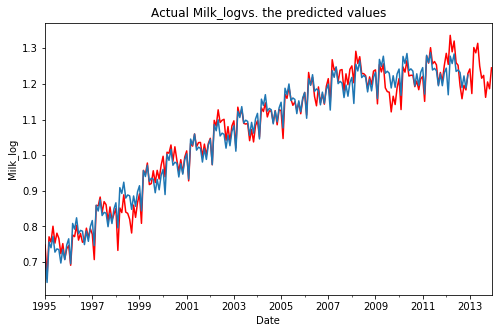

In [27]:
# Define function to plot the actual and predicted values
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5))                                # Set plot area
    ax = fig.gca()                                                  # Define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + 'vs. the predicted values')      # Give the plot a main title
    ax.set_xlabel('Date')                                           # Set text for the x axis
    ax.set_ylabel(col)                                              # Set text for y axis

plot_mod_fit(CADairy, 'Milk_log')  

It can be observed that both the trend and seasonal components fit the actual data quite well. Only at the end of the series, 
the fit is not as good, which might be a problem because this is last 12 months period that we try to predict. 
<br>

To see the error, it is calculated the __RMSE (Root Mean Squared Error) of the fit of the model for the last 12 months 
of the Milk production time series__.

In [28]:
# Define function to calculate the RMSE
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

## Make the forecast for the next year
X = CADairy.loc['2012-12-31':, ['Month.Count', 'monthNumSqred', 'monthNumCubed', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].to_numpy()
RMSE(CADairy.loc['2012-12-31':, 'Milk_log'].to_numpy(), mod_fit.predict(X))

0.13524126222369068

__The RMSE value for the model with only the trend and sesonal components is 0.13__. 
<br>

Next are plotted the time series plot and distribution plots of the residuals to check the model.

In [29]:
# Define function to plot the histogram and Q-Q Normal plot of the values of the time series
def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    ts.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of ' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax2) 

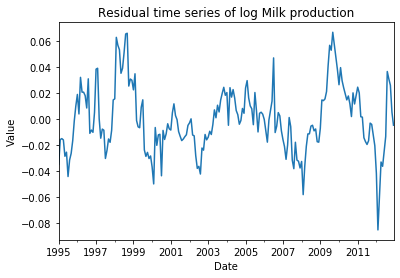

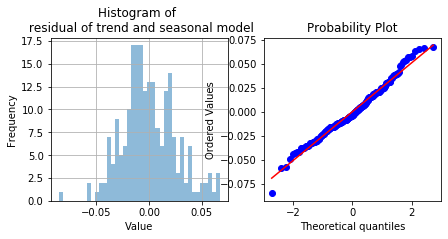

In [30]:
# Plot the time series
plot_ts(CADairy.loc[:'2012-12-31', 'resids'], title = 'Residual time series of log Milk production')
# Plot the histogram and Q-Q Normal plot of the values of the time series
dist_ts(CADairy.loc[:'2012-12-31', 'resids'], '\n residual of trend and seasonal model')

It can be noted that the residual looks pretty stationary. __The distribution plots of both the histogram 
and the QQ plot of residuals show the values to be close to Normally distributed__. The values are generally around zero, in 
the range between minus 0.05 and plus 0.05.

Next we want to find if the residual series is stationary by applying the Dicky Fuller test.

In [31]:
DF_Test(CADairy.loc[:'2012-12-31', 'resids'])

D-F statistic = -4.629902367773566
p-value = 0.00011373279240861113
number of lags used = 0
Critical value at 5% confidence = -2.875078880098608
Critical value at 10% confidence = -2.5739861168199027


The D-F test statistic is lower than the critical values of 5% and 10% and the p-value is less than the significance level 
of 0.05. So, we can __reject the null hypothesis and infer that the time series is stationary__.

The steps until now included creating a linear model of trend and seasonality that fit the actual data quite well, as the plot 
showed. __The distribution of the residuals is close to normal. The plot of the residuals series and the result of Dickey-Fuller
test showed that residual series is stationary.__ <br>
To make a better forecast, it is needed an __ARIMA component for the residual__. The model will be trained without the last 12 
months of data, which will be used to evaluate the model. Below it it searched the best ARIMA model order.

In [32]:
# Use the step_ARIMA function with maximum orders of 4, 3, 4
BIC, order, model_fit = step_ARIMA(CADairy.loc[:'2012-12-31', 'resids'], 4, 3, 4)    
print('Best order = ' + str(order) + ' best BIC = ' + str(BIC))

Testing model of order: (0, 0, 1) with BIC = -1103.4886428275638
Testing model of order: (0, 0, 2) with BIC = -1147.857782947387
Testing model of order: (0, 0, 3) with BIC = -1178.1580917838373
Testing model of order: (0, 0, 4) with BIC = -1177.0042964063016
Testing model of order: (0, 1, 1) with BIC = -1189.025327325722
Testing model of order: (0, 1, 2) with BIC = -1184.7026263574312
Testing model of order: (0, 1, 3) with BIC = -1180.7590742942605
Testing model of order: (0, 1, 4) with BIC = -1178.8230783658348
Testing model of order: (0, 2, 1) with BIC = -1173.4669644983412
Testing model of order: (0, 2, 2) with BIC = -1171.4499368683878
Testing model of order: (0, 2, 3) with BIC = -1166.9462208812647
Testing model of order: (0, 2, 4) with BIC = -1162.8098375582942
Testing model of order: (1, 0, 0) with BIC = -1209.6064524461403
Testing model of order: (1, 0, 1) with BIC = -1204.5577163647893
Testing model of order: (1, 0, 2) with BIC = -1199.2801689347716
Testing model of order: (1,

C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (1, 2, 2) with BIC = -1173.613330649735
Testing model of order: (1, 2, 3) with BIC = -1161.9265103127734
Testing model of order: (2, 0, 0) with BIC = -1204.5726170928672
Testing model of order: (2, 0, 1) with BIC = -1199.2286363486326
Testing model of order: (2, 0, 2) with BIC = -1193.9075274788295
Testing model of order: (2, 0, 3) with BIC = -1189.6750244322875
Testing model of order: (2, 0, 4) with BIC = -1186.158131334209
Testing model of order: (2, 1, 0) with BIC = -1183.9146276085658
Testing model of order: (2, 1, 1) with BIC = -1190.7828408245416
Testing model of order: (2, 1, 2) with BIC = -1185.144179498652


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing model of order: (2, 1, 3) with BIC = -1184.351081858863
Testing model of order: (2, 1, 4) with BIC = -1169.6247571162492
Testing model of order: (2, 2, 0) with BIC = -1101.0243215270093
Testing model of order: (2, 2, 1) with BIC = -1166.3055549731848
Testing model of order: (2, 2, 2) with BIC = -1161.7685982122887


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\catif\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\catif\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\catif\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\catif\anaconda3\lib\site-package

Testing model of order: (2, 2, 3) with BIC = -1169.882130522421


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (2, 2, 4) with BIC = -1155.5661979423066
Testing model of order: (3, 0, 0) with BIC = -1199.2661566171766
Testing model of order: (3, 0, 1) with BIC = -1193.891527747027
Testing model of order: (3, 0, 2) with BIC = -1198.2435898144663
Testing model of order: (3, 0, 3) with BIC = -1186.1070015580012
Testing model of order: (3, 0, 4) with BIC = -1181.6926442715678
Testing model of order: (3, 1, 0) with BIC = -1179.4869234924302
Testing model of order: (3, 1, 1) with BIC = -1185.4505154418246
Testing model of order: (3, 1, 2) with BIC = -1180.738820121941


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (3, 1, 3) with BIC = -1180.6630420607191


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (3, 1, 4) with BIC = -1180.5680290743946
Testing model of order: (3, 2, 0) with BIC = -1104.9509574960634
Testing model of order: (3, 2, 1) with BIC = -1161.7584046179247
Testing model of order: (3, 2, 2) with BIC = -1156.4027945519151


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (3, 2, 3) with BIC = -1153.7611106103718


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (3, 2, 4) with BIC = -1149.8379374452131
Testing model of order: (4, 0, 0) with BIC = -1193.8967294058918
Testing model of order: (4, 0, 1) with BIC = -1190.1867452845427
Testing model of order: (4, 0, 2) with BIC = -1199.1313041502954
Testing model of order: (4, 0, 3) with BIC = -1189.4688348232567
Testing model of order: (4, 0, 4) with BIC = -1185.1525233281943
Testing model of order: (4, 1, 0) with BIC = -1178.3575026054916
Testing model of order: (4, 1, 1) with BIC = -1174.4355692554918
Testing model of order: (4, 1, 2) with BIC = -1169.1305316033256


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing model of order: (4, 1, 3) with BIC = -1177.7075768100874


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (4, 1, 4) with BIC = -1170.3940798828899
Testing model of order: (4, 2, 0) with BIC = -1125.7915503117
Testing model of order: (4, 2, 1) with BIC = -1160.37365067184
Testing model of order: (4, 2, 2) with BIC = -1156.5377314005418
Testing model of order: (4, 2, 3) with BIC = -1151.264914981595
Testing model of order: (4, 2, 4) with BIC = -1150.1992256481237
Best order = (1, 0, 0) best BIC = -1209.6064524461403


C:\Users\catif\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


The best model found is (1, 0, 0) and it has BIC = -1209.6064524461403. <br>
We will use this model to test how well it computes on its own.

In [33]:
arima_remainder = model_ARIMA(CADairy.loc[:'2012-12-31', 'resids'], order = (1, 0, 0))

                              ARMA Model Results                              
Dep. Variable:                 resids   No. Observations:                  216
Model:                     ARMA(1, 0)   Log Likelihood                 610.179
Method:                           mle   S.D. of innovations              0.014
Date:                Wed, 18 Nov 2020   AIC                          -1216.357
Time:                        13:56:59   BIC                          -1209.606
Sample:                    01-31-1995   HQIC                         -1213.630
                         - 12-31-2012                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.resids     0.8248      0.038     21.617      0.000       0.750       0.900
                                    Roots                                    
                  Real          Imaginary      

Observations:
- The p-value of the coefficient is very small.
- The confidence intervals for the coefficient do not include zero, so the coefficient is significant.
- The standard error of the AR coefficient is very small in magnitude than the coefficient themselves.
- There is no warning method about being unstable.
<br>

Based on these observations, this is the best model that will be used to compute an ARIMA model. Then the model will be used
to make predictions for the last 12 months of the Milk production time series. <br>
Now will be combined all three components to try to make a better forecast. First will make predictions from
the ARIMA model for the 12 months from the start of 2013. For this it is used the predict method, with a start index and an end
index for the model.

In [34]:
start_index = len(CADairy.loc[:'2012-12-31', 'resids'])
end_index = start_index + 12
model_prediction = model_fit.predict(start=start_index, end=end_index)
model_prediction

2013-01-31   -0.003742
2013-02-28   -0.003087
2013-03-31   -0.002546
2013-04-30   -0.002100
2013-05-31   -0.001732
2013-06-30   -0.001429
2013-07-31   -0.001179
2013-08-31   -0.000972
2013-09-30   -0.000802
2013-10-31   -0.000661
2013-11-30   -0.000546
2013-12-31   -0.000450
2014-01-31   -0.000371
Freq: M, dtype: float64

Predictions look like a series of small numbers. 
<br>

Next we make a prediction for the last 12 months of the log of the Milk production time series using the features from
the regression model. The prediction is the combination of the trend, seasonal, and residual (ARIMA) models.

In [35]:
## Make the forecast for the next year

# The trends components: 'Month.Count', 'monthNumSqred', 'monthNumCubed'
# The seasonal component: the months of the year
X = CADairy.loc['2012-12-31':, ['Month.Count', 'monthNumSqred', 'monthNumCubed', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].to_numpy()

## The predictions for the forecast
# The reason there's a minus before the model_prediction is just because of the sign of the predictions, they are negative. 
# So we actually take a difference there. But the sign isn't so important.
CADairy.loc['2012-12-31':, 'scores'] =  mod_fit.predict(X) - model_prediction

In [ ]:
# CADairy.head()

Next we plot the actual time series (in red) and the prediction (in blue).

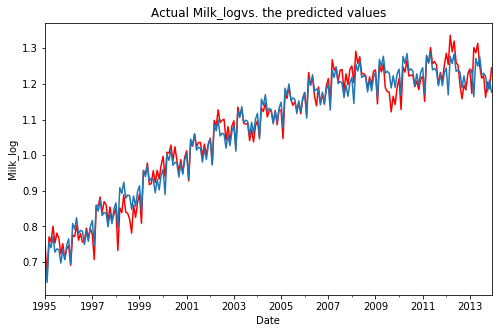

In [36]:
# So we're going to plot the difference there
plot_mod_fit(CADairy, 'Milk_log') 

It can be noted that the forecast looks reasonable, relatively well fit. The actual time series in red, looks very similar
with the prediction in blue, for the last 12 months.

Below it is computed the RMSE and compared to the model with only trend and seasonal component.

In [37]:
RMSE(CADairy.loc['2012-12-31':, 'Milk_log'].to_numpy(), CADairy.loc['2012-12-31':, 'scores'])

0.23557847613621202

The model with the trend and seasonal components plus an ARIMA model for residual has an RMSE value of 0.23. This value is 
higher then RMSE of 0.13 for the model with only the trend and sesonal components. It seems that in this case, 
adding an ARIMA component did not improve the model prediction.

__Summary:__
    
It was computed model a using ordinary linear regression for the trend, and the months of the year as the seasonal component. 
It was taken the remaider of that and computed an ARIMA model, then were made predictions from that ARIMA model. There were
made predictions also from the seasonal and trend model. The results for RMSE showed that adding an ARIMA component for the
residual did not help making a better forecast.